# Walkthroughs and Exercises for GenAI-Powered Data Analysis in Python

Dr. Chester Ismay

# Data Analytics Kickoff + Course Goals

## Walkthrough #1: Setting Up the Python Environment

If you haven’t already installed Python, Jupyter, and the necessary
packages, there are instructions on the course repo in the README to do
so
[here](https://github.com/ismayc/oreilly-genai-powered-data-analysis-with-python/blob/main/README.md).

If you aren’t able to do this on your machine, you may want to check out
[Google Colab](https://colab.research.google.com/). It’s a free service
that allows you to run Jupyter notebooks in the cloud.

In [ ]:
# If you want to install the packages all at once to start
!pip install pandas matplotlib seaborn plotly

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [35]:
# For plotly to load directly in Jupyter notebook
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

## Exercise #1: Setting Up the Python Environment

Follow the instructions above in Walkthrough #1 to check for correct
installation of necessary packages. We’ll wait a few minutes to make
sure as many of you are set up as possible. Please give a thumbs up in
the pulse check if you are ready to move on.

We’ll work with ChatGPT as our GenAI tool. If you are getting errors at
this point and would like to ask it for assistance, go for it! We’ll
make more use of it throughout the course, and I’ll give tips along the
way too.

------------------------------------------------------------------------

# *Day 1: Prompt to Wrangle*

------------------------------------------------------------------------

# Module 1: Data Wrangling with Pandas

## Walkthrough #2: Cleaning and Preparing Data with Pandas

### Import data from a CSV

In [36]:
# Load the data from a CSV file
economies = pd.read_csv("economies.csv")

### Perform an initial exploration of the data

In [4]:
# Display the first few rows of the DataFrame
economies.head()

,code,country,year,gdp_percapita,gross_savings,inflation_rate,total_investment,unemployment_rate,exports,imports,income_group
0,ABW,Aruba,2010,24087.950,13.255,2.078,NaN,10.600,NaN,NaN,High income
1,ABW,Aruba,2015,27126.620,21.411,0.475,NaN,7.298,NaN,NaN,High income
2,ABW,Aruba,2020,21832.920,-7.521,-1.338,NaN,13.997,NaN,NaN,High income
3,AFG,Afghanistan,2010,631.490,59.699,2.179,30.269,NaN,9.768,32.285,Low income
4,AFG,Afghanistan,2015,711.337,22.223,-0.662,18.427,NaN,-11.585,15.309,Low income


In [5]:
economies

,code,country,year,gdp_percapita,gross_savings,inflation_rate,total_investment,unemployment_rate,exports,imports,income_group
0,ABW,Aruba,2010,24087.950,13.255,2.078,NaN,10.600,NaN,NaN,High income
1,ABW,Aruba,2015,27126.620,21.411,0.475,NaN,7.298,NaN,NaN,High income
2,ABW,Aruba,2020,21832.920,-7.521,-1.338,NaN,13.997,NaN,NaN,High income
3,AFG,Afghanistan,2010,631.490,59.699,2.179,30.269,NaN,9.768,32.285,Low income
4,AFG,Afghanistan,2015,711.337,22.223,-0.662,18.427,NaN,-11.585,15.309,Low income
...,...,...,...,...,...,...,...,...,...,...,...
556,ZMB,Zambia,2015,1310.460,40.103,10.107,42.791,NaN,-11.407,0.696,Lower middle income
557,ZMB,Zambia,2020,981.311,36.030,16.350,34.514,NaN,1.143,2.635,Lower middle income
558,ZWE,Zimbabwe,2010,975.851,NaN,3.045,NaN,NaN,NaN,NaN,Lower middle income
559,ZWE,Zimbabwe,2015,1425.010,NaN,-2.410,NaN,NaN,NaN,NaN,Lower middle income


In [6]:
# Display the information about the DataFrame
economies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code               561 non-null    object 
 1   country            561 non-null    object 
 2   year               561 non-null    int64  
 3   gdp_percapita      558 non-null    float64
 4   gross_savings      490 non-null    float64
 5   inflation_rate     555 non-null    float64
 6   total_investment   490 non-null    float64
 7   unemployment_rate  312 non-null    float64
 8   exports            509 non-null    float64
 9   imports            506 non-null    float64
 10  income_group       561 non-null    object 
dtypes: float64(7), int64(1), object(3)
memory usage: 48.3+ KB


In [7]:
# Display summary statistics of the DataFrame
economies.describe()

,year,gdp_percapita,gross_savings,inflation_rate,total_investment,unemployment_rate,exports,imports
count,561.000000,558.000000,490.000000,555.000000,490.000000,312.000000,509.000000,506.000000
mean,2015.000000,13447.838281,20.641665,9.762438,25.348976,8.894619,-0.844275,0.813121
std,4.086126,18481.107981,10.813159,103.013164,23.546022,5.605188,17.817279,15.644724
min,2010.000000,231.549000,-10.331000,-3.900000,0.521000,0.900000,-80.939000,-59.381000
25%,2010.000000,1842.815000,14.129000,0.731000,18.449250,5.252250,-8.528000,-8.253000
50%,2015.000000,5049.830000,20.536000,2.507000,22.808000,7.400000,1.000000,1.334000
75%,2020.000000,16509.697500,26.819750,5.406000,27.644750,10.772000,8.033000,9.348000
max,2020.000000,116921.110000,59.699000,2355.150000,363.411000,32.050000,159.103000,84.555000


### Handle missing data

#### Remove rows

In [8]:
# Remove rows with any missing values
economies_cleaned_any = economies.dropna(how='any')
economies_cleaned_any

,code,country,year,gdp_percapita,gross_savings,inflation_rate,total_investment,unemployment_rate,exports,imports,income_group
9,ALB,Albania,2010,4097.83,20.023,3.615,31.318,14.000,10.473,-9.316,Upper middle income
10,ALB,Albania,2015,3953.61,15.804,1.868,26.237,17.100,5.272,0.076,Upper middle income
11,ALB,Albania,2020,5286.68,13.255,1.603,22.845,12.500,-28.951,-21.446,Upper middle income
15,ARG,Argentina,2010,10412.97,17.323,10.461,17.706,7.750,13.701,39.414,Upper middle income
17,ARG,Argentina,2020,8554.64,17.798,42.015,16.845,11.364,-13.124,-10.722,Upper middle income
...,...,...,...,...,...,...,...,...,...,...,...
541,VNM,Vietnam,2015,2582.39,26.444,0.631,27.339,2.330,9.713,15.426,Lower middle income
542,VNM,Vietnam,2020,3498.98,28.603,3.222,26.444,3.300,2.822,2.948,Lower middle income
552,ZAF,South Africa,2010,7311.74,18.012,4.264,19.513,24.875,7.718,10.794,Upper middle income
553,ZAF,South Africa,2015,5731.73,16.300,4.575,20.918,25.350,2.925,5.443,Upper middle income


In [9]:
# Remove rows with missing values in specific columns (exports and imports)
economies.dropna(subset=['exports', 'imports'])

,code,country,year,gdp_percapita,gross_savings,inflation_rate,total_investment,unemployment_rate,exports,imports,income_group
3,AFG,Afghanistan,2010,631.490,59.699,2.179,30.269,NaN,9.768,32.285,Low income
4,AFG,Afghanistan,2015,711.337,22.223,-0.662,18.427,NaN,-11.585,15.309,Low income
5,AFG,Afghanistan,2020,580.817,27.132,5.607,16.420,NaN,-10.424,2.892,Low income
6,AGO,Angola,2010,3641.440,34.833,14.480,28.197,NaN,-3.266,-21.656,Lower middle income
7,AGO,Angola,2015,4354.920,28.491,9.159,34.202,NaN,6.721,-19.515,Lower middle income
...,...,...,...,...,...,...,...,...,...,...,...
553,ZAF,South Africa,2015,5731.730,16.300,4.575,20.918,25.350,2.925,5.443,Upper middle income
554,ZAF,South Africa,2020,5067.150,14.602,3.268,12.426,29.175,-10.280,-16.615,Upper middle income
555,ZMB,Zambia,2010,1456.050,37.405,8.500,29.878,NaN,19.476,32.492,Lower middle income
556,ZMB,Zambia,2015,1310.460,40.103,10.107,42.791,NaN,-11.407,0.696,Lower middle income


#### Replace missing values with specific value

In [10]:
# Replace missing values with a specific value (e.g., 0 for numerical columns, 'Unknown' for categorical columns)
economies_fill_value = economies.fillna({
    'gdp_percapita': 0,
    'gross_savings': 0,
    'inflation_rate': 0,
    'total_investment': 0,
    'unemployment_rate': 0,
    'exports': 0,
    'imports': 0,
    'income_group': 'Unknown'
})

# Display the DataFrame after replacing missing values with specific values
economies_fill_value

,code,country,year,gdp_percapita,gross_savings,inflation_rate,total_investment,unemployment_rate,exports,imports,income_group
0,ABW,Aruba,2010,24087.950,13.255,2.078,0.000,10.600,0.000,0.000,High income
1,ABW,Aruba,2015,27126.620,21.411,0.475,0.000,7.298,0.000,0.000,High income
2,ABW,Aruba,2020,21832.920,-7.521,-1.338,0.000,13.997,0.000,0.000,High income
3,AFG,Afghanistan,2010,631.490,59.699,2.179,30.269,0.000,9.768,32.285,Low income
4,AFG,Afghanistan,2015,711.337,22.223,-0.662,18.427,0.000,-11.585,15.309,Low income
...,...,...,...,...,...,...,...,...,...,...,...
556,ZMB,Zambia,2015,1310.460,40.103,10.107,42.791,0.000,-11.407,0.696,Lower middle income
557,ZMB,Zambia,2020,981.311,36.030,16.350,34.514,0.000,1.143,2.635,Lower middle income
558,ZWE,Zimbabwe,2010,975.851,0.000,3.045,0.000,0.000,0.000,0.000,Lower middle income
559,ZWE,Zimbabwe,2015,1425.010,0.000,-2.410,0.000,0.000,0.000,0.000,Lower middle income


### Convert a column to a different data type

In [12]:
# Change year to be a string instead of an integer
economies_char_year = economies.astype({'year': 'str'})

# Display the information on the DataFrame with year as a string
economies_char_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code               561 non-null    object 
 1   country            561 non-null    object 
 2   year               561 non-null    object 
 3   gdp_percapita      558 non-null    float64
 4   gross_savings      490 non-null    float64
 5   inflation_rate     555 non-null    float64
 6   total_investment   490 non-null    float64
 7   unemployment_rate  312 non-null    float64
 8   exports            509 non-null    float64
 9   imports            506 non-null    float64
 10  income_group       561 non-null    object 
dtypes: float64(7), object(4)
memory usage: 48.3+ KB


In [11]:
?economies.astype

Signature:
economies.astype(
    dtype,
    copy: 'bool_t | None' = None,
    errors: 'IgnoreRaise' = 'raise',
) -> 'Self'
Docstring:
Cast a pandas object to a specified dtype ``dtype``.

Parameters
----------
dtype : str, data type, Series or Mapping of column name -> data type
    Use a str, numpy.dtype, pandas.ExtensionDtype or Python type to
    cast entire pandas object to the same type. Alternatively, use a
    mapping, e.g. {col: dtype, ...}, where col is a column label and dtype is
    a numpy.dtype or Python type to cast one or more of the DataFrame's
    columns to column-specific types.
copy : bool, default True
    Return a copy when ``copy=True`` (be very careful setting
    ``copy=False`` as changes to values then may propagate to other
    pandas objects).

    .. note::
        The `copy` keyword will change behavior in pandas 3.0.
        `Copy-on-Write
        <https://pandas.pydata.org/docs/dev/user_guide/copy_on_write.html>`__
        will be enabled by default, whi

In [13]:
# Change the year of string type back to integer
economies_int_year = economies_char_year.astype({'year': 'int'})

# Display the information on the DataFrame with year as an integer
economies_int_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code               561 non-null    object 
 1   country            561 non-null    object 
 2   year               561 non-null    int64  
 3   gdp_percapita      558 non-null    float64
 4   gross_savings      490 non-null    float64
 5   inflation_rate     555 non-null    float64
 6   total_investment   490 non-null    float64
 7   unemployment_rate  312 non-null    float64
 8   exports            509 non-null    float64
 9   imports            506 non-null    float64
 10  income_group       561 non-null    object 
dtypes: float64(7), int64(1), object(3)
memory usage: 48.3+ KB


### Rename a column

In [14]:
# Rename the 'income_group' column to 'income_category'
economies.rename(columns={'income_group': 'income_category'})

,code,country,year,gdp_percapita,gross_savings,inflation_rate,total_investment,unemployment_rate,exports,imports,income_category
0,ABW,Aruba,2010,24087.950,13.255,2.078,NaN,10.600,NaN,NaN,High income
1,ABW,Aruba,2015,27126.620,21.411,0.475,NaN,7.298,NaN,NaN,High income
2,ABW,Aruba,2020,21832.920,-7.521,-1.338,NaN,13.997,NaN,NaN,High income
3,AFG,Afghanistan,2010,631.490,59.699,2.179,30.269,NaN,9.768,32.285,Low income
4,AFG,Afghanistan,2015,711.337,22.223,-0.662,18.427,NaN,-11.585,15.309,Low income
...,...,...,...,...,...,...,...,...,...,...,...
556,ZMB,Zambia,2015,1310.460,40.103,10.107,42.791,NaN,-11.407,0.696,Lower middle income
557,ZMB,Zambia,2020,981.311,36.030,16.350,34.514,NaN,1.143,2.635,Lower middle income
558,ZWE,Zimbabwe,2010,975.851,NaN,3.045,NaN,NaN,NaN,NaN,Lower middle income
559,ZWE,Zimbabwe,2015,1425.010,NaN,-2.410,NaN,NaN,NaN,NaN,Lower middle income


### Filtering rows based on conditions

#### Conditions on a single column

In [15]:
# Filter rows where 'gdp_percapita' is greater than 20,000
economies[economies['gdp_percapita'] > 20_000]

,code,country,year,gdp_percapita,gross_savings,inflation_rate,total_investment,unemployment_rate,exports,imports,income_group
0,ABW,Aruba,2010,24087.95,13.255,2.078,NaN,10.600,NaN,NaN,High income
1,ABW,Aruba,2015,27126.62,21.411,0.475,NaN,7.298,NaN,NaN,High income
2,ABW,Aruba,2020,21832.92,-7.521,-1.338,NaN,13.997,NaN,NaN,High income
12,ARE,United Arab Emirates,2010,35064.26,31.330,0.878,27.121,NaN,7.540,0.405,High income
13,ARE,United Arab Emirates,2015,37380.57,30.540,4.070,25.639,NaN,3.055,2.488,High income
...,...,...,...,...,...,...,...,...,...,...,...
475,SWE,Sweden,2015,51274.28,27.743,0.704,24.429,7.400,4.995,5.031,High income
476,SWE,Sweden,2020,51796.38,29.755,0.657,24.518,8.292,-5.191,-5.358,High income
528,USA,United States,2010,48403.30,15.466,1.637,18.743,9.608,12.137,13.128,High income
529,USA,United States,2015,56848.51,20.141,0.121,21.163,5.275,0.421,5.175,High income


In [16]:
# Filter rows where 'income_group' is 'High income'
economies[economies.income_group == 'High income']

,code,country,year,gdp_percapita,gross_savings,inflation_rate,total_investment,unemployment_rate,exports,imports,income_group
0,ABW,Aruba,2010,24087.95,13.255,2.078,NaN,10.600,NaN,NaN,High income
1,ABW,Aruba,2015,27126.62,21.411,0.475,NaN,7.298,NaN,NaN,High income
2,ABW,Aruba,2020,21832.92,-7.521,-1.338,NaN,13.997,NaN,NaN,High income
12,ARE,United Arab Emirates,2010,35064.26,31.330,0.878,27.121,NaN,7.540,0.405,High income
13,ARE,United Arab Emirates,2015,37380.57,30.540,4.070,25.639,NaN,3.055,2.488,High income
...,...,...,...,...,...,...,...,...,...,...,...
526,URY,Uruguay,2015,16692.65,17.223,8.666,17.477,7.525,-7.564,-8.145,High income
527,URY,Uruguay,2020,15777.96,12.873,9.756,14.319,10.350,-28.231,-12.544,High income
528,USA,United States,2010,48403.30,15.466,1.637,18.743,9.608,12.137,13.128,High income
529,USA,United States,2015,56848.51,20.141,0.121,21.163,5.275,0.421,5.175,High income


#### Conditions on multiple columns

In [20]:
# Filter rows where inflation_rate is less than 0 and income_group is 'Low income'
economies[ (economies.inflation_rate < 0) & (economies.income_group == 'Low income') ]

,code,country,year,gdp_percapita,gross_savings,inflation_rate,total_investment,unemployment_rate,exports,imports,income_group
4,AFG,Afghanistan,2015,711.337,22.223,-0.662,18.427,NaN,-11.585,15.309,Low income
42,BFA,Burkina Faso,2010,648.365,20.194,-0.608,21.990,NaN,54.547,13.986,Low income
486,TCD,Chad,2010,895.354,25.871,-2.110,34.388,NaN,-5.488,17.218,Low income


## Exercise #2: Cleaning and Preparing Data with Pandas

In [37]:
# Load the populations data from a CSV file
populations = pd.read_csv('populations.csv')

In [ ]:
# Examine the first few rows


In [ ]:
# Display the information about the DataFrame


In [ ]:
# Display summary statistics of the DataFrame


### Handle Missing Data

#### Remove rows

In [ ]:
# Remove rows with any missing values


In [ ]:
# Remove rows with missing values in fertility_rate and life_expectancy


#### Replace missing values with specific value

In [ ]:
# Replace missing values with a specific value (e.g., 0 for numerical columns, 
# 'Unknown' for categorical columns)


### Convert a Column to a Different Data Type and Rename a Column

#### Convert a Column to a Different Data Type

In [ ]:
# Convert the 'year' column to string type


In [ ]:
# Convert it back to integer


#### Rename a Column

In [ ]:
# Rename the 'fertility_rate' column to 'fertility'


#### Filter a DataFrame

In [ ]:
# Filter the DataFrame to include only rows where the 'continent' is 'Asia'


In [ ]:
# Filter the DataFrame to include only rows where the 'year' is 2020


In [ ]:
# Filter the DataFrame to include only rows where the 
# 'fertility_rate' is greater than 2


# Module 2: Transforming and Aggregating Data with Pandas

## Walkthrough #3: Summarizing Data with Pandas

### Grouping data

In [21]:
# Get the mean gdp per capita for each income_group
economies.groupby('income_group')['gdp_percapita'].mean()

income_group
High income            33781.737556
Low income               688.904493
Lower middle income     2329.609629
Not classified          7805.646667
Upper middle income     6679.059320
Name: gdp_percapita, dtype: float64

In [21]:
# Get the mean gdp per capita for each income_group
economies.groupby('income_group')['gdp_percapita'].mean()

income_group
High income            33781.737556
Low income               688.904493
Lower middle income     2329.609629
Not classified          7805.646667
Upper middle income     6679.059320
Name: gdp_percapita, dtype: float64

In [ ]:
economies['gdp_percapita'].mean()

### Applying Functions

#### Applying a function element-wise with `map()`

In [25]:
# Convert income_group to uppercase using map()
# Convert income_group to uppercase using map()
economies_plus = economies.copy()
economies_plus['income_group_upper'] = economies['income_group'].map(str.upper)
economies_plus.head()

,code,country,year,gdp_percapita,gross_savings,inflation_rate,total_investment,unemployment_rate,exports,imports,income_group,income_group_upper
0,ABW,Aruba,2010,24087.950,13.255,2.078,NaN,10.600,NaN,NaN,High income,HIGH INCOME
1,ABW,Aruba,2015,27126.620,21.411,0.475,NaN,7.298,NaN,NaN,High income,HIGH INCOME
2,ABW,Aruba,2020,21832.920,-7.521,-1.338,NaN,13.997,NaN,NaN,High income,HIGH INCOME
3,AFG,Afghanistan,2010,631.490,59.699,2.179,30.269,NaN,9.768,32.285,Low income,LOW INCOME
4,AFG,Afghanistan,2015,711.337,22.223,-0.662,18.427,NaN,-11.585,15.309,Low income,LOW INCOME


#### Applying a Function to Groups with `groupby()` and `agg()`

In [26]:
# Calculate the median gdp_percapita and inflation_rate for each income_group
economies.groupby('income_group').agg({
    'gdp_percapita': 'median',
    'inflation_rate': 'median'
})

,gdp_percapita,inflation_rate
income_group,,
High income,29529.305,0.8595
Low income,631.490,5.0490
Lower middle income,2012.150,4.4370
Not classified,10568.100,121.7380
Upper middle income,6083.870,2.7645


### Summary tables

In [27]:
# Create a pivot table of gdp_percapita and inflation_rate (mean of each)
# by income_group and year
economies.pivot_table(
    values=['gdp_percapita', 'inflation_rate'],
    index=['income_group'],
    columns=['year'],
    aggfunc='mean'
)

gdp_percapita                             inflation_rate  \
year                         2010          2015          2020           2010   
income_group                                                                   
High income          33265.256167  33484.692333  34595.264167       2.168550   
Low income             736.990261    685.146565    644.576652       5.915000   
Lower middle income   2151.058283   2399.781453   2437.989151       5.778264   
Not classified       11158.180000  10568.100000   1690.660000      28.187000   
Upper middle income   6463.234694   6919.517551   6654.425714       4.251592   

                                              
year                       2015         2020  
income_group                                  
High income            0.910950     0.666333  
Low income             7.187591    14.530182  
Lower middle income    4.951170    18.002566  
Not classified       121.738000  2355.150000  
Upper middle income    3.186125     3.886408

### Analyzing categorical data

#### Using cross-tabulation

In [28]:
# Show counts of income_group by year
pd.crosstab(economies.income_group, economies.year)

year,2010,2015,2020
income_group,,,
High income,60,60,60
Low income,24,24,24
Lower middle income,53,53,53
Not classified,1,1,1
Upper middle income,49,49,49


#### By getting group counts

In [29]:
# Count the occurrences of each income_group
economies.income_group.value_counts()

income_group
High income            180
Lower middle income    159
Upper middle income    147
Low income              72
Not classified           3
Name: count, dtype: int64

## Exercise #3: Summarizing Data with Pandas

### Grouping Data

In [ ]:
# Group data by continent and calculate the mean life expectancy

### Applying Functions

#### Applying a function element-wise with `map()`

In [ ]:
# Convert continent to uppercase using map()


#### Applying a function to groups with `groupby()` and `agg()`

In [ ]:
# Calculate the median fertility rate and life expectancy for each continent


### Summary Tables

In [ ]:
# Create a pivot table of fertility rate and life expectancy by continent and year


### Analyzing Categorical Data

#### Using Cross-Tabulation

In [ ]:
# Create a cross-tabulation of continent and year


#### By Getting Group Counts

In [ ]:
# Count the occurrences of each region


------------------------------------------------------------------------

# Module 3: Exploring and Learning from Mistakes

Use the provided prompt as your initial guide. Here are 8 Python errors
that you’ll attempt to use LLMs to help you debug. Make sure to run the
code in Jupyter first and then try to debug!

## Walkthrough and Exercise #4: Debug with GenAI

### 1

In [32]:
populations.hed

AttributeError: 'DataFrame' object has no attribute 'hed'

### 2

In [33]:
populations.size.mean()

AttributeError: 'int' object has no attribute 'mean'

### 3

In [ ]:
populations['Life_Expectancy'].mean()

### 4

In [ ]:
asia = populations[populations['continent'] = 'Asia']

### 5

In [ ]:
populations[populations['continent'] == 'Asia' & populations['year'] == 2020]

### 6

In [ ]:
populations[populations['population_size'] > 1_000_000]

### 7

In [ ]:
populations['double_size'] = populations['size'].apply(lambda x: x * 2, axis=1)

### 8

In [ ]:
populations['fertility_rate'].fillna(0)

------------------------------------------------------------------------

# *Day 2: Visualize to Tell*

------------------------------------------------------------------------

# Module 4: Data Visualization Basics with Matplotlib and Seaborn

## Walkthrough #5: Data Visualization Techniques

### Line plot with Matplotlib

In [38]:
economies

,code,country,year,gdp_percapita,gross_savings,inflation_rate,total_investment,unemployment_rate,exports,imports,income_group
0,ABW,Aruba,2010,24087.950,13.255,2.078,NaN,10.600,NaN,NaN,High income
1,ABW,Aruba,2015,27126.620,21.411,0.475,NaN,7.298,NaN,NaN,High income
2,ABW,Aruba,2020,21832.920,-7.521,-1.338,NaN,13.997,NaN,NaN,High income
3,AFG,Afghanistan,2010,631.490,59.699,2.179,30.269,NaN,9.768,32.285,Low income
4,AFG,Afghanistan,2015,711.337,22.223,-0.662,18.427,NaN,-11.585,15.309,Low income
...,...,...,...,...,...,...,...,...,...,...,...
556,ZMB,Zambia,2015,1310.460,40.103,10.107,42.791,NaN,-11.407,0.696,Lower middle income
557,ZMB,Zambia,2020,981.311,36.030,16.350,34.514,NaN,1.143,2.635,Lower middle income
558,ZWE,Zimbabwe,2010,975.851,NaN,3.045,NaN,NaN,NaN,NaN,Lower middle income
559,ZWE,Zimbabwe,2015,1425.010,NaN,-2.410,NaN,NaN,NaN,NaN,Lower middle income


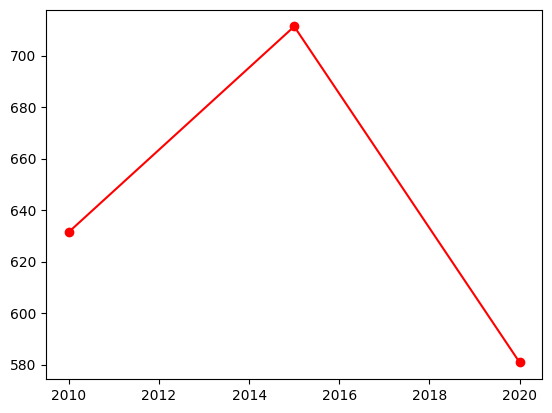

In [42]:
# Filter data for a specific country
afg_data = economies[ economies.code == 'AFG' ]
afg_data

# Line plot of gdp_percapita over the years
plt.plot(afg_data.year, afg_data.gdp_percapita,
        marker='o', linestyle='-', color='red')
plt.show()

### Bar chart with Matplotlib

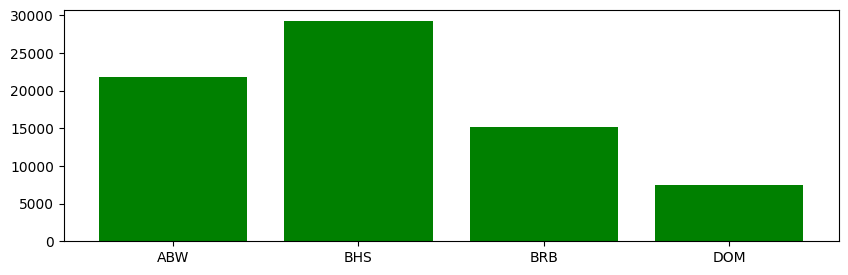

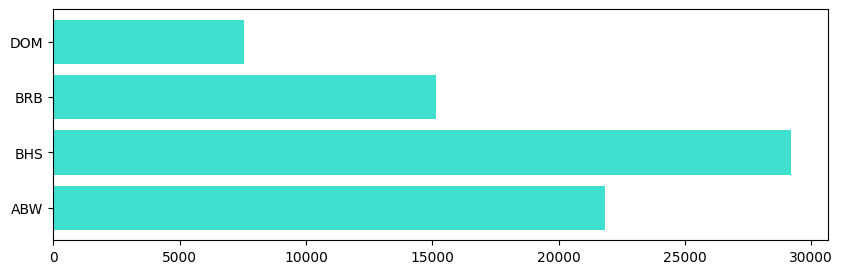

In [51]:
# Filter data for Caribbean countries and the year 2020
caribbean_countries = ['ABW', 'BHS', 'BRB', 'DOM']
data_2020_carib = economies[ (economies.year == 2020) & (economies.code.isin(caribbean_countries)) ]

# Bar chart of gdp_percapita for different Caribbean countries in 2020
plt.figure(figsize=(10, 3))
plt.bar(x=data_2020_carib.code,
        height=data_2020_carib['gdp_percapita'],
        color='green');
#plt.show()

plt.savefig("carib_bar.png", dpi=300)

# Horizontal version
plt.figure(figsize=(10, 3))
plt.barh(y=data_2020_carib.code, width=data_2020_carib['gdp_percapita'], color='turquoise');
plt.show()

### Adding labels and titles

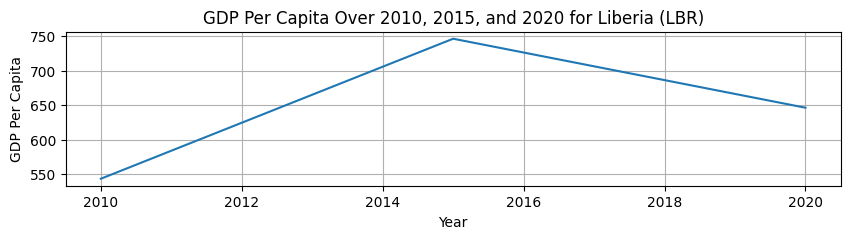

In [53]:
# Filter data for a specific country
liberia_data = economies[ economies.code == 'LBR' ]

# Line plot of gdp_percapita over the years with labels and titles
plt.figure(figsize=(10, 2))
plt.plot(liberia_data.year, liberia_data.gdp_percapita)
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.title('GDP Per Capita Over 2010, 2015, and 2020 for Liberia (LBR)')
plt.grid(True)
plt.show()

### Adjusting axes and tick marks

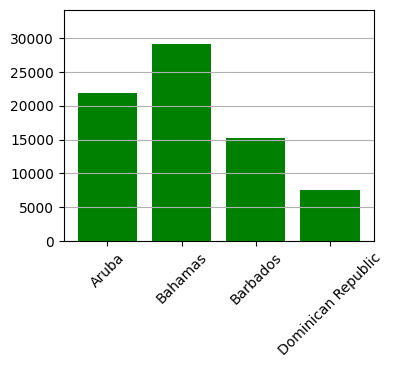

In [60]:
# Bar chart of gdp_percapita for different Caribbean countries in 2020 with 
# adjusted axes and tick marks
plt.figure(figsize=(4, 3))
plt.bar(x=data_2020_carib.country,
        height=data_2020_carib['gdp_percapita'],
        color='green');
plt.grid(axis='y')

# Adjust axes
plt.ylim(0, max(data_2020_carib.gdp_percapita) + 5_000);

# Adjust tick marks
plt.xticks(rotation=45)
plt.show()

### Histogram with Seaborn

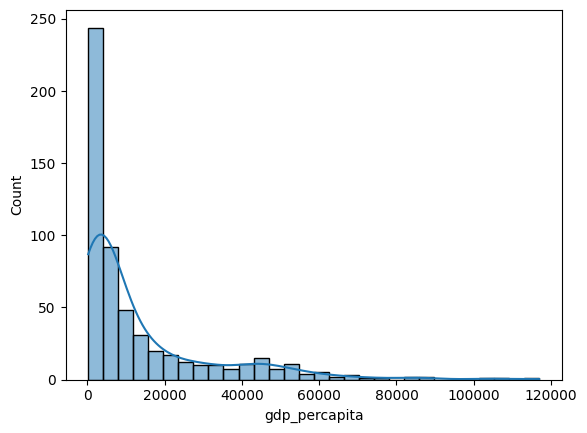

In [62]:
# Histogram of gdp_percapita
sns.histplot(economies.gdp_percapita, bins=30, kde=True);
plt.show()

### Boxplot with Seaborn

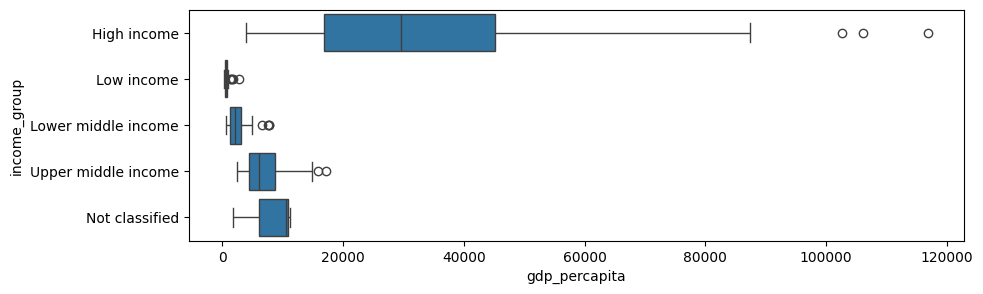

In [64]:
# Boxplot of gdp_percapita by income_group
plt.figure(figsize=(10, 3))
sns.boxplot(x='gdp_percapita', y='income_group', data=economies);
plt.savefig("gdp_by_income.png")
plt.show()

### Violin plot with Seaborn

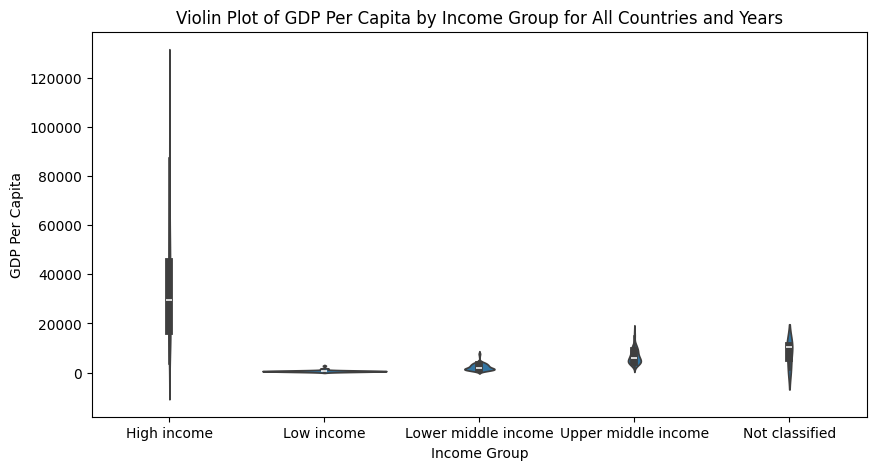

In [67]:
# Violin plot of gdp_percapita by income_group
plt.figure(figsize = (10, 5))
sns.violinplot(x='income_group', y='gdp_percapita', data=economies);
plt.xlabel('Income Group');
plt.ylabel('GDP Per Capita');
plt.title('Violin Plot of GDP Per Capita by Income Group for All Countries and Years');
plt.show()

## Exercise #5: Data Visualization Techniques

### Line Plot with Matplotlib

In [ ]:
# Filter data for India


# Line plot of fertility rate over the years


### Bar Chart with Matplotlib

In [ ]:
# Filter data for selected Asian countries and the year 2020
asian_countries = ['CHN', 'IND', 'IDN', 'PAK', 'BGD']


# Bar chart of population size for selected Asian countries in 2020


### Adding Labels and Titles

In [ ]:
# Filter data for Nigeria


# Line plot of life expectancy over the years with labels and titles


### Adjusting Axes and Tick Marks

In [ ]:
# Filter data for selected African countries ('NGA', 'ETH', 'EGY', 'ZAF', 'DZA')
# and the year 2020
african_countries = ['NGA', 'ETH', 'EGY', 'ZAF', 'DZA']


# Bar chart of fertility rate for selected African countries in 2020 with 
# adjusted axes and tick marks






# Adjust axes


# Adjust tick marks


### Histogram with Seaborn

In [ ]:
# Histogram of life expectancy


### Boxplot with Seaborn

In [ ]:
# Boxplot of fertility rate by continent


### Violin Plot with Seaborn

In [ ]:
# Violin plot of fertility rate by continent


------------------------------------------------------------------------

# Module 5: Interactive Data Visualization with Plotly

## Walkthrough #6: Interactive Charts and Dashboards with Plotly

### Basic interactive chart

In [ ]:
# Filter data for a specific country


# Create an interactive line chart


### Adding interactive elements

In [ ]:
# Create an interactive scatter plot





# Add hover, zoom, and selection tools


### Designing a simple dashboard

In [ ]:
# Filter data for the year 2020


# Create a subplot figure with 1 row and 2 columns





# Line chart of GDP Per Capita for Afghanistan





# Bar chart of GDP Per Capita for different countries in 2020




# Update layout


## Exercise #6: Interactive Charts and Dashboards with Plotly

### Basic Interactive Chart

In [ ]:
# Filter data for a specific country (Brazil)


# Create an interactive line chart (Fertility Rate Over Years)


### Adding Interactive Elements

In [ ]:
# Create an interactive scatter plot





# Add hover, zoom, and selection tools


### Designing a Simple Dashboard

In [ ]:
# Filter data for the year 2020


# Create a subplot figure with 1 row and 2 columns





# Line chart of Life Expectancy for Brazil





# Bar chart of Life Expectancy for South American countries in 2020





# Update layout to add a title and hide the legend
